In [ ]:
'''
Contribua com nosso projeto de disponibilizar mais material deste tipo fazendo uma doação para o pix: python.economia@gmail.com


Neste arquivo, apresentamos os comandos utilizados para gerar o gráfico que colocamos na tela inicial das aulas do curso de
Introdução à Inferência Estatística I. Veja as aulas em nosso canal do youtube:
https://www.youtube.com/channel/UCmliDKnSuMJ1Pi4hqGdn2Dw

Os itens 1, 2 e 3 apenas tentam esclarecer alguns comandos que aparecem no tópico 4, em que construímos de fato o gráfico.

'''

In [1]:
import matplotlib.patches
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### 1. List comprehension

In [2]:
# 1.1 
lista_1 = [1, 2, 3, 4]

x_quadrado = list()

for i in lista_1:
    i_quadrado = i ** 2
    x_quadrado.append(i_quadrado)
    
x_quadrado

[1, 4, 9, 16]

In [3]:
# 1.2: List comprehension
# O que fizemos em 1.1 pode ser feito em apenas uma linha da forma abaixo (list comprehension)
[x ** 2 for x in lista_1]

[1, 4, 9, 16]

In [4]:
# 1.3: O operador + aplicado à duas listas faz a junção das listas, como abaixo
[(0,0), (1, 2)] + [(1,1), (2,2)]

[(0, 0), (1, 2), (1, 1), (2, 2)]

--- 

### 2. Função: Gerando os valores de f(x)

In [5]:
# 2.1: Gera 5 números de 0 a 10 igualmente espaçados
x = np.linspace(start=0, stop=10, num=5)   
x

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [6]:
# 2.2: Define uma função f
def f(i):
    y = 2 * i
    return y

In [7]:
# 2.3: Retorna y = f(x)  para os valores de x em 2.1
f(x)

array([ 0.,  5., 10., 15., 20.])

---

### 3. Polígonos

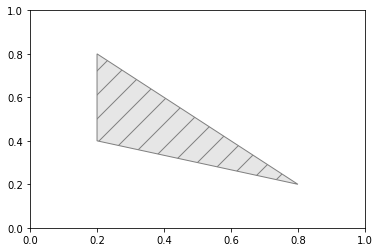

In [8]:
fig, ax = plt.subplots()

ponto_1 = (0.2, 0.4) 
ponto_2 = (0.2, 0.8)
ponto_3 = (0.8, 0.2)

vertices = [ponto_1, ponto_2, ponto_3]
poly = matplotlib.patches.Polygon(vertices, 
                                  facecolor='0.9', 
                                  edgecolor='0.5', 
                                  hatch='/')

ax.add_patch(poly)
plt.show()

---

### 4. Curva Normal (construção do gráfico)

In [9]:
def N(x, media=0, desvio_padrao=1):
    '''
    Retorna os valores 
    '''
    y = stats.norm.pdf(x, loc=media, scale=desvio_padrao)
    return y

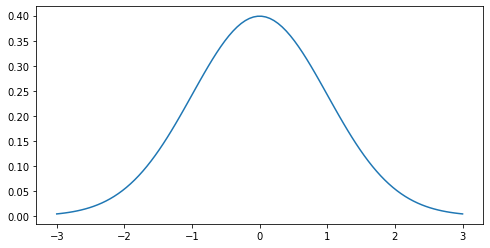

In [10]:
# Gera o gráfico da curva normal padrão utilizando a função criada acima
x = np.linspace(start=-3, stop=3, num=100)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, N(x))
plt.show()

In [11]:
# Obtém valor de x1 para que área abaixo de x1 igual a 0.025
x1 = stats.norm.ppf(0.025, loc=0, scale = 1)
x1

-1.9599639845400545

In [12]:
# Obtém valor de x2 para que área acima de x2 iguala 0.025
x2 = stats.norm.isf(0.025, loc=0, scale = 1)
x2

1.9599639845400545

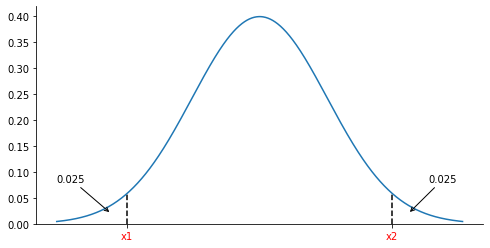

In [13]:
# Abaixo, podemos ver x1 e x2 graficamente
x = np.linspace(start=-3, stop=3, num=1000) 

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, N(x))

ax.set_ylim(ymin=0)

ax.spines[['top', 'right']].set_visible(False)

ax.vlines(x=x1, ymin=0, ymax=N(x1), linestyle='--', color='black')
ax.vlines(x=x2, ymin=0, ymax=N(x2), linestyle='--', color='black')

ax.set_xticks([x1, x2])
ax.set_xticklabels(labels=['x1', 'x2'], fontdict={'color': 'red','horizontalalignment': 'center'})

ax.annotate(text='0.025', xy=(-2.2, 0.02), xytext=(-3, 0.08), arrowprops={'arrowstyle':'->'})
ax.annotate(text='0.025', xy=(2.2, 0.02), xytext=(2.5, 0.08), arrowprops={'arrowstyle':'->'})

plt.show()

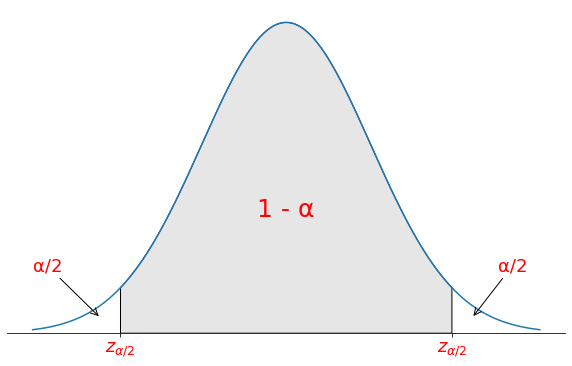

In [14]:
# Gera a curva normal padrão
x = np.linspace(start=-3, stop=3, num=1000)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, N(x))
ax.set_ylim(ymin=0)
ax.set_xticks([x1, x2])
ax.set_xticklabels(labels=['$z_{α/2}$', '$z_{α/2}$'],   #$z_{α/2}$ é a forma utilizada no latex para escrever "α/2" subscrito
                           fontdict={'color': 'red','horizontalalignment': 'center', 'size':18})
ax.set_yticks([])
ax.spines[['top', 'left', 'right']].set_visible(False)

# Gera a área cinza abaixo da curva normal padrão
n_vertices = 1000   # comece atribuindo o valor 2 e aumente de 2 em 2 para ver o que ocorre com o gráfico
x_area_cinza =  np.linspace(start=x1, stop=x2, num=n_vertices)
vertices = [(x1, 0)] + [(x, N(x)) for x in x_area_cinza] + [(x2, 0)]
poly = matplotlib.patches.Polygon(vertices, facecolor='0.9', edgecolor='black')
ax.add_patch(poly)

ax.text(x=(x1 + x2)/2,y=0.15, s="1 - α", fontsize=25, horizontalalignment='center', color='red')
ax.annotate(text='α/2', xy=(-2.2, 0.02), xytext=(-3, 0.08), color='red', fontsize=18, arrowprops={'arrowstyle':'->'})
ax.annotate(text='α/2', xy=(2.2, 0.02), xytext=(2.5, 0.08), color='red', fontsize=18,arrowprops={'arrowstyle':'->'})

plt.show()